# <center>Don't Over Fit II
 
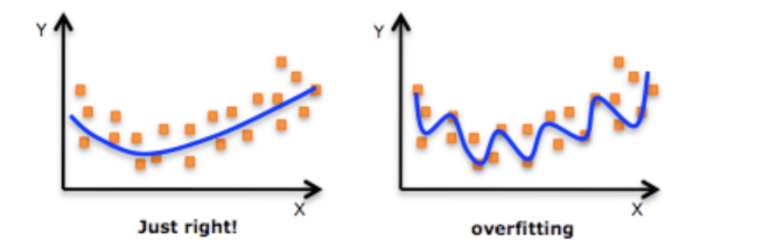
    

### WHY?
1. 최근 개인적으로 모델에 대한 성능을 높이는 것에 대한 관심이 높아졌다.<br> 모델의 성능을 올리려고 하면 Overfitting이 자꾸 일어났다.
2. 이것을 해결하기 위한 방법을 배우고 싶었고 다양한 변수선택(feature selection)의 방법을 배우고 싶었다.

### HOW?
1. Kaggle의 가장많은 vote를 받은 "How to not overfit?"을 참고했다.
2. 총 2번의 노트북을 만들예정이다.
 * 첫번째는 "How to not overfit?" 필사(현재 노트북)
 * ~~두번째는 필사와 여러 노트북, 내가 알고있는 지식을 활용해서 데이터 분석 및 모델링~~
 
### GOAL
1. 여러가지 방법으로 변수선택을 해보겠다.
2. Overfitting이 일어나지 않게 모델의 성능을 올려보겠다.

## 목차
1.  [라이브러리 Import 및 설정](#라이브러리-Import-및-설정)<br><br>
2.  [데이터 불러오기](#데이터-불러오기)<br><br>
3.  [탐색적 데이터 분석(EDA)](#탐색적-데이터-분석(EDA))<br><br>
4.  [기본 모델링](#기본-모델링)<br><br>
5.  [ELI5](#ELI5)<br><br>
6.  [SHAP](#SHAP)<br><br>
7.  [SFS(Sequential Feature Selection)](#SFS(Sequential-Feature-Selection))<br><br>
8.  [여러 모델링](#여러-모델링)<br><br>
9.  [Feature Adding](#Feature-Adding)<br><br>
10. [SelectPercentile & SelectKBest](#SelectPercentile-&-SelectKBest)<br><br>
11. [RFE](#RFE)<br><br>


### 라이브러리 Import 및 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings(action='ignore')

sns.set_palette("pastel")
sns.set_style('whitegrid')
os.chdir('C:/Users/icear/Desktop/새 폴더/dont over fit2')

### 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 탐색적 데이터 분석(EDA)
 + 데이터 개수 확인
 + 데이터 분포
 + target 분포
 + 각 변수간의 상관관계 확인

In [3]:
# 데이터 개수 확인

train.shape

# ㄷㄷ row가 250개이고 column이 302개

(250, 302)

In [4]:
train.head(10)

id  target      0      1      2      3      4      5      6      7  ...  \
0   0     1.0 -1.067 -1.114 -0.616  0.376  1.090  0.467 -0.422  0.460  ...   
1   1     0.0 -0.831  0.271  1.716  1.096  1.731 -0.197  1.904 -0.265  ...   
2   2     0.0  0.099  1.390 -0.732 -1.065  0.005 -0.081 -1.450  0.317  ...   
3   3     1.0 -0.989 -0.916 -1.343  0.145  0.543  0.636  1.127  0.189  ...   
4   4     0.0  0.811 -1.509  0.522 -0.360 -0.220 -0.959  0.334 -0.566  ...   
5   5     0.0  0.739  0.211 -0.836 -1.430 -0.291 -0.989  0.091  0.107  ...   
6   6     1.0  1.257 -1.562  0.832  0.432  1.667  0.843 -0.037 -0.960  ...   
7   7     0.0  0.668 -0.077  0.014 -1.523  1.207  0.810 -0.879  0.965  ...   
8   8     0.0  1.321  0.156  0.602 -1.305 -0.951 -0.740  0.283  1.509  ...   
9   9     0.0  1.279  0.855 -0.734 -0.250 -0.819  0.633  0.447  1.875  ...   

     290    291    292    293    294    295    296    297    298    299  
0  0.220 -0.339  0.254 -0.179  0.352  0.125  0.347  0.436  0.958 -0.824  
1 -0.765 -0.735 -1.158  2.554  0.856 -1.506  0.462 -0.029 -1.932 -0.343  
2 -1.311  0.799 -1.001  1.544  0.575 -0.309 -0.339 -0.148 -0.646  0.725  
3 -1.370  1.093  0.596 -0.589 -0.649 -0.163 -0.958 -1.081  0.805  3.401  
4 -0.178  0.718 -1.017  1.249 -0.596 -0.445  1.751  1.442 -0.393 -0.643  
5 -1.501 -1.960  0.671  0.091 -1.467 -1.011 -0.118 -0.257 -0.337 -1.064  
6  0.024  0.391  0.547 -0.416 -0.333  0.857  0.422 -0.833 -1.055  0.439  
7 -0.923 -0.643  0.559 -0.271 -0.848 -0.437  0.100 -1.654 -0.237 -1.219  
8 -0.451 -0.331 -0.930  0.123  0.119  0.005 -1.636 -0.259 -0.547  0.575  
9 -0.207  1.583 -1.028  0.124 -0.051 -0.504 -1.364 -0.810  0.461  0.309  

[10 rows x 302 columns]

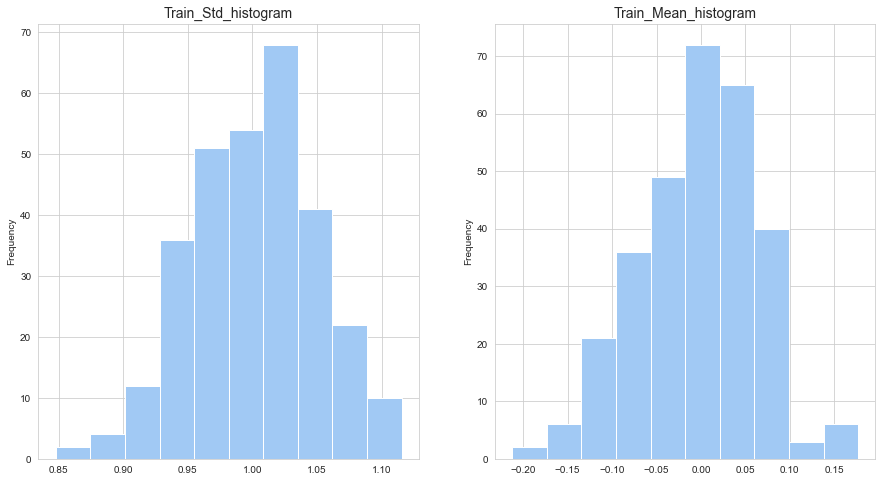

In [5]:
# 데이터 분포 확인

f,ax=plt.subplots(1,2,figsize=(15,8))
train[train.columns[2:]].std().plot(kind='hist',ax=ax[0])
train[train.columns[2:]].mean().plot(kind='hist',ax=ax[1])
ax[0].set_title('Train_Std_histogram' , fontsize = 14)
ax[1].set_title('Train_Mean_histogram' , fontsize = 14)

plt.show()
# 각 칼럼 300개를 하나씩 볼수는 없으므로 칼럼별로 std,mean값을 구해본다

In [6]:
# 널값이 있나? checking!

train.isnull().any().any()

# column 수가 많을 때 any().any()가 효과적인듯하다.

False

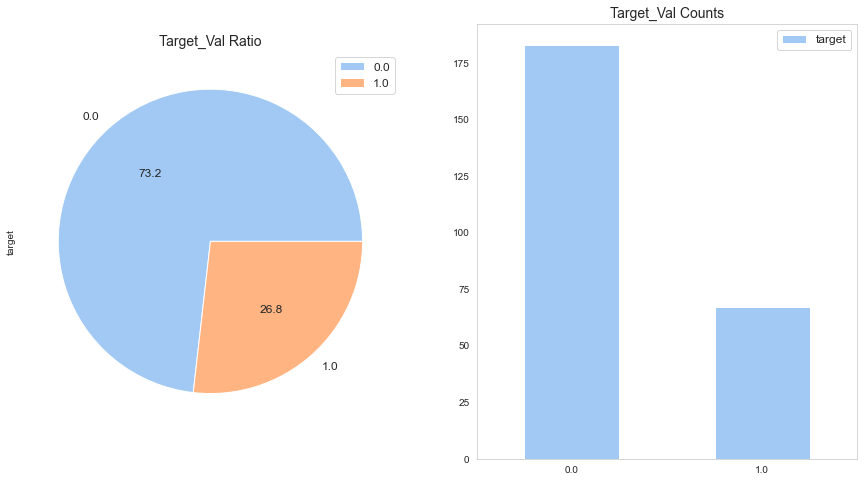

In [7]:
# target값이 어떤 분포인가? 확인

f,ax=plt.subplots(1,2,figsize=(15,8))
train['target'].value_counts().plot(kind = 'pie', autopct = '%.1f', fontsize = 12, ax = ax[0])
ax[0].legend(fontsize = 12, loc='upper right')
ax[0].set_title('Target_Val Ratio', fontsize = 14)

train['target'].value_counts().plot(kind = 'bar',ax = ax[1])
# seaborn으로 바꾸자
ax[1].legend(fontsize = 12, loc='upper right')
ax[1].set_title('Target_Val Counts' , fontsize = 14)
plt.xticks(rotation=0)

plt.grid()
plt.show()

# target의 값이 0, 1로 이진분류이다.
# 0과 1의 차이가 조금 있는것으로 확인된다.

In [8]:
# 각 변수간의 상관관계

corrs = train.corr().abs().unstack().sort_values().reset_index() 
print('corrs의 형태' , corrs.shape)
# train의 corr을 절대값으로 표현하고 메트릭스형태를 unstack으로 풀음

corrs = corrs[corrs['level_0'] != corrs['level_1']] # level_0과 level_1의 동일한 것들은 제거
print('제거후 corrs의 형태' , corrs.shape)

corrs.tail(10) # 높은 상관관계가 보이지 않는다. 제일 높은 것은 0.3375

corrs의 형태 (91204, 3)
제거후 corrs의 형태 (90902, 3)


level_0 level_1         0
90892     219     279  0.238512
90893     279     219  0.238512
90894      23      20  0.246984
90895      20      23  0.246984
90896     146     228  0.258447
90897     228     146  0.258447
90898       6      39  0.267727
90899      39       6  0.267727
90900     127  target  0.337540
90901  target     127  0.337540

### 기본 모델링
- 로지스틱 회귀를 기본으로 사용
- Standard scaler 사용
- StratifiedKFold 사용으로 교차검증

In [9]:
from sklearn.model_selection import StratifiedKFold # 기존 KFold와 다르게 타깃값의 분포를 유지하면서 KFold
from sklearn.preprocessing import StandardScaler # 스케일 조정
from sklearn.model_selection import cross_val_score , cross_val_predict # 교차검증
from sklearn.metrics import confusion_matrix # 혼돈행렬

x_train = train.drop(['id','target'], axis = 1)
y_train = train['target']

x_test = test.drop(['id'], axis = 1)

n_fold = 20
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = 42)

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression # 이진분류이므로 기본 모델은 로지스틱 회귀로 시작
model = LogisticRegression()
model.fit(x_train,y_train)

score_lr = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('로지스틱 회귀 : 평균 score :{}'.format(score_lr.mean()))

로지스틱 회귀 : 평균 score :0.748076923076923


### ELI5
- eli5
- eli5 & Permutation Importance

In [11]:
import eli5 # eli5로 featrue에 대한 중요도 산정해보겠다.
from eli5.sklearn import PermutationImportance

In [12]:
eli5.show_weights(model, top = 10) 
# 밑처럼 좋은 영향을 주는 변수는 초록색으로 안좋은 영향을 주는 변수는 빨간색으로 표시한다.

In [13]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(model).head(50).feature if 'BIAS' not in i] # top feature 50개만 추출

# feature추출 된것을 train, test에 적용
x_train = train[top_features]
x_test = test[top_features]

# standard scaler를 적용시킨다.
scalar = StandardScaler() 
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [14]:
# 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train,y_train)

# 평균적으로 77.28%의 정확도가 나왔다.
score = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score.mean()))
prdeict = cross_val_predict(model, x_train, y_train, cv = skf) # 교차검증으로 예측
cm = confusion_matrix(y_train, prdeict) # confusion_matrix 산출
print('confustion_matrix\n',cm)

평균 score :0.7727564102564102
confustion_matrix
 [[160  23]
 [ 34  33]]


- 아무것도 손을 안된 로지스틱 회귀보다 CV가 높게 나왔다.
- Feature의 선택이 정확도를 올려주는 효과가 있다.

In [15]:
perm = PermutationImportance(model, random_state = 1).fit(x_train, y_train) # PermutationImportance로 적용
eli5.show_weights(perm, top = 50)

In [16]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(perm).feature if 'BIAS' not in i] # top feature만 추출

In [17]:
# feature추출 된것을 train, test에 적용
x_train = train[top_features]
x_test = test[top_features]

# standard scaler를 적용시킨다.
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train,y_train)

# 평균적으로 65.77%의 정확도가 나왔다.
score = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score.mean()))

평균 score :0.6576923076923078


- 실수가 있었는지 아니면 eli5의 permutation importance가 약간 부정확한건지 모르겠지만 eli5 show_weight를 적용했을때 보다 CV가 작게 나왔다.

### SHAP
- shap value를 이용한 summary plot
- shap value를 이용한 force_plot

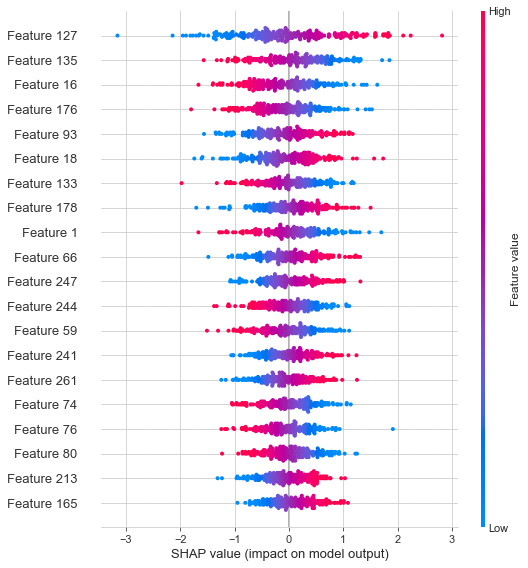

In [18]:
import shap # shap

x_train = train.drop(['id','target'], axis = 1)
y_train = train['target']

x_test = test.drop(['id'], axis = 1)

n_fold = 20
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = 42)

# standardscaler로 스케일링
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# 이진분류이므로 기본 모델은 로지스틱 회귀로 시작
model = LogisticRegression()
model.fit(x_train,y_train)

# shap_value를 구하고 summary_plot
explainer = shap.LinearExplainer(model, x_train) # linear면 linear로 tree면 tree로
shap_values = explainer.shap_values(x_train)

shap.summary_plot(shap_values, x_train)
# feature 127의 경우 변수의 값이 높으면 예상 값이 높다.
# feature 135의 경우 변수의 값이 낮으면 예상 값이 높다.

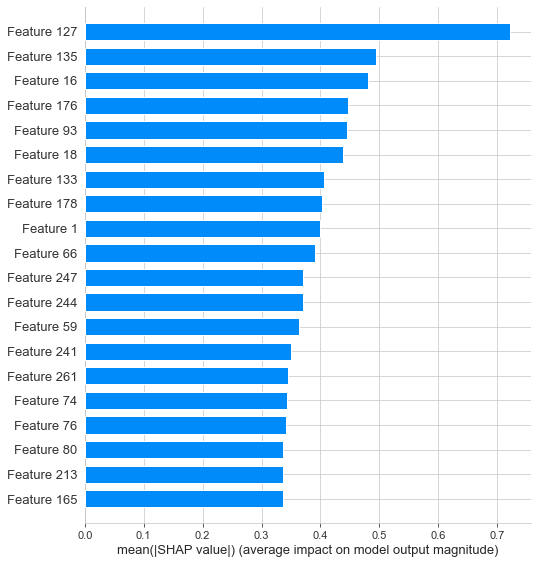

In [19]:
shap.summary_plot(shap_values, x_train, plot_type = 'bar')

# 각 변수의 shap_value에 절대값이라고 한다. 변수의 평균적인 영향력을 보여준다.
# 큰 영향력을 보일 수 록 target과 관계성(인과관계X)이 크다.

- 변수 127, 135, 16, 176 정도의 변수가 Shap_value기준 값이 높다.
- shap_value 기준 변수를 뽑으면 되겠다.

In [20]:
x_test = test.drop(['id'], axis = 1)

shap.initjs() # javascript 초기화
shap.force_plot(explainer.expected_value, shap_values[1,:], x_test.iloc[1,:])
# 빨간색이 영향도가 높은것이고 파란색이 낮은 영향도를 나타낸다.

In [21]:
shap.force_plot(explainer.expected_value, shap_values, x_test)

### SFS(Sequential Feature Selection)

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # 하나씩 선택해서 넣어보고 변수 선택

sfs1 = SFS(model, 
         k_features=(5,50), # 5번째부터 50번째까지 체킹
         forward = True,
          floating = False,
          scoring = 'roc_auc',
          cv = skf,
          n_jobs = -1 # 모든 코어 사용 Defult = 1
         )

sfs1 = sfs1.fit(x_train, y_train)

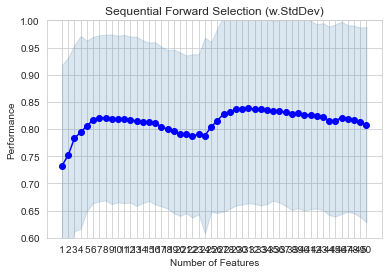

In [23]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection (w.StdDev)')
plt.show()

- top feature가 많아질수록 성능이 올라갈 줄 알았다.
- 정확도가 내려가다가 올라갈수도 있다.
- feature가 많다고 항상 성능이 향상되는것은 아니다.

In [24]:
# top_featrue 추출
top_feature = list(sfs1.k_feature_names_) 

x_train = train[top_feature]
x_test = test[top_feature]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train,y_train)

# 평균적으로 77.66%의 정확도가 나왔다.
score = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('lr & top_feature : 평균 score :{}'.format(score.mean()))
prdeict = cross_val_predict(model, x_train, y_train, cv = skf) # 교차검증으로 예측

lr & top_feature : 평균 score :0.7766025641025641


- 모든 변수를 가지고 LR을 적용했을때보다 top 변수를 추가해서 LR을 적용했을때 정확도가 높아졌다.

### 여러 모델링
- Gussian Naive Bayes
- Ada Boost Classification
- Extra Tree Classification
- Random Forest Classification
- Gussian Process Classification
- Support Vector Classification
- K Neighbors Classification
- Bernoulli Naive Bayes
- Stochastic Gradient Descent Classification

In [25]:
x_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']
x_test = test.drop(['id'], axis = 1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
gnb = GaussianNB()
gnb.fit(x_train,y_train)

score_gnb = cross_val_score(gnb,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('GaussianNB : 평균 score :{}'.format(score_gnb.mean()))

GaussianNB : 평균 score :0.7243589743589743


In [27]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

score_abc = cross_val_score(abc,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('AdaBoostClassifier : 평균 score :{}'.format(score_abc.mean()))

AdaBoostClassifier : 평균 score :0.6833333333333333


In [28]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)

score_etc = cross_val_score(etc,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('ExtraTreesClassifier : 평균 score :{}'.format(score_etc.mean()))

ExtraTreesClassifier : 평균 score :0.7326923076923078


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

parameter_grid = {'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth' : [None, 3, 5, 15]}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(x_train, y_train)

print('Best Score: {}'.format(grid_search.best_score_))
print('Best Params: {}'.format(grid_search.best_params_))

rfc = RandomForestClassifier(max_depth = 15, n_estimators = 100)
rfc.fit(x_train,y_train)

score_rfc = cross_val_score(rfc,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('RandomForestClassifier : 평균 score :{}'.format(score_rfc.mean()))

Best Score: 0.6830555555555555
Best Params: {'max_depth': 3, 'n_estimators': 1000}
RandomForestClassifier : 평균 score :0.7326923076923078


In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()
gpc.fit(x_train,y_train)

score_gpc = cross_val_score(gpc,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('GaussianProcessClassifier : 평균 score :{}'.format(score_gpc.mean()))

GaussianProcessClassifier : 평균 score :0.6548076923076923


In [31]:
from sklearn.svm import SVC

svc = SVC(probability = True, gamma = 'scale')
parameter_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0],
                 'kernel' : ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(x_train, y_train)

print('Best Score: {}'.format(grid_search.best_score_))
print('Best Params: {}'.format(grid_search.best_params_))

svc = SVC(C = 10.0, kernel = 'rbf')
svc.fit(x_train,y_train)

score_svc = cross_val_score(svc,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('SVC : 평균 score :{}'.format(score_svc.mean()))

Best Score: 0.6980555555555554
Best Params: {'C': 10.0, 'kernel': 'rbf'}
SVC : 평균 score :0.7205128205128205


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
parameter_grid = {'n_neighbors' : [2,3,5,7,9,10,20],
                 'weights' : ['uniform', 'distance'],
                 'leaf_size' : [5, 10, 30]}

grid_search = GridSearchCV(knc, param_grid = parameter_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(x_train, y_train)

print('Best Score: {}'.format(grid_search.best_score_))
print('Best Params: {}'.format(grid_search.best_params_))

knc = KNeighborsClassifier(leaf_size = 5, n_neighbors = 20, weights = 'distance')
knc.fit(x_train,y_train)

score_knc = cross_val_score(knc,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('KNeighborsClassifier : 평균 score :{}'.format(score_knc.mean()))

Best Score: 0.5949074074074073
Best Params: {'leaf_size': 5, 'n_neighbors': 20, 'weights': 'distance'}
KNeighborsClassifier : 평균 score :0.7326923076923078


In [33]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
parameter_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 2, 10]}
grid_search = GridSearchCV(bnb, param_grid = parameter_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(x_train, y_train)
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Params: {}'.format(grid_search.best_params_))

bnb = BernoulliNB(alpha = 2)
bnb.fit(x_train,y_train)

score_bnb = cross_val_score(bnb,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('BernoulliNB : 평균 score :{}'.format(score_bnb.mean()))

Best Score: 0.5453703703703704
Best Params: {'alpha': 2}
BernoulliNB : 평균 score :0.6391025641025642


In [34]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(eta0 = 1, max_iter = 1000, tol = 0.0001)
parameter_grid = {'loss' : ['log', 'modified_huber'], # 확률적 경사하경법 적용 로지스틱, SVM
                 'penalty' : ['l1','l2','elasticnet'],
                 'alpha' : [0.001, 0.01],
                 'l1_ratio' : [0, 0.15, 0.5, 1],
                 'learning_rate' : ['optimal','invscaling','adaptive']}

grid_search = GridSearchCV(sgd, param_grid = parameter_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(x_train, y_train)
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Params: {}'.format(grid_search.best_params_))

sgd = SGDClassifier(eta0 = 1, tol = 0.0001, **grid_search.best_params_)
sgd.fit(x_train,y_train)

score_sgd = cross_val_score(sgd,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('SGDClassifier : 평균 score :{}'.format(score_sgd.mean()))

Best Score: 0.7666666666666666
Best Params: {'alpha': 0.01, 'l1_ratio': 1, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}
SGDClassifier : 평균 score :0.7365384615384615


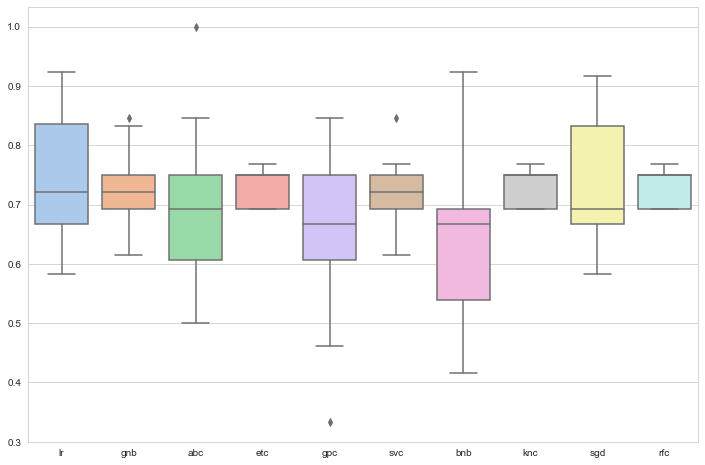

In [35]:
# 모델들 시각화 cv기준 score을 boxpolt

f, ax= plt.subplots(figsize=(12,8))

score_df = pd.DataFrame({'lr':score_lr})
score_df['gnb'] = score_gnb
score_df['abc'] = score_abc
score_df['etc'] = score_etc
score_df['gpc'] = score_gpc
score_df['svc'] = score_svc
score_df['bnb'] = score_bnb
score_df['knc'] = score_knc
score_df['sgd'] = score_sgd
score_df['rfc'] = score_rfc

sns.boxplot(data=score_df)

plt.show()

- 로지스틱 회귀와 svc정도가 정확도가 높다.

### Feature Adding
- PolynomialFeatures add
- NearestNeighbors 기반 거리 add

In [36]:
# 각 변수의 X^2값들을 데이터에 추가

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # x^2
x_train = train.drop(['id','target'], axis = 1)
x_test = test.drop(['id'], axis = 1)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [37]:
cor = pd.DataFrame(x_train_poly).corrwith(y_train)

In [38]:
# 상관도 기준으로 TOP 변수를 선정해서 CV진행

sc = []
for i in range(10, 100, 5):
    top_corr_cols = list(cor.abs().sort_values().tail(i).reset_index()['index'].values)
    x_train_poly1 = x_train_poly[:, top_corr_cols]
    x_test_poly1 = x_test_poly[:,top_corr_cols]
    model = LogisticRegression()
    model.fit(x_train_poly1,y_train)

    score_lr = cross_val_score(model,x_train_poly1, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
    print('평균 score :{}'.format(score_lr.mean()))
    sc.append(score_lr)

평균 score :0.8163461538461538
평균 score :0.8833333333333332
평균 score :0.8682692307692308
평균 score :0.8996794871794872
평균 score :0.9153846153846155
평균 score :0.9278846153846153
평균 score :0.9240384615384615
평균 score :0.9201923076923076
평균 score :0.9195512820512821
평균 score :0.9439102564102564
평균 score :0.951602564102564
평균 score :0.9557692307692307
평균 score :0.9637820512820514
평균 score :0.9682692307692309
평균 score :0.9685897435897436
평균 score :0.9602564102564104
평균 score :0.9685897435897436
평균 score :0.9721153846153847


In [39]:
top_corr_cols = list(cor.abs().sort_values().tail(100).reset_index()['index'].values)

x_train_poly1 = x_train_poly[:, top_corr_cols]
x_test_poly1 = x_test_poly[:, top_corr_cols]

model = LogisticRegression()
model.fit(x_train_poly1,y_train)

score_lr = cross_val_score(model,x_train_poly1, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score_lr.mean()))

평균 score :0.964423076923077


In [40]:
# 거리변수 추가

In [41]:
# 기본 깨끗한 Train, Test 데이터 셋

x_train = train.drop(['id','target'], axis = 1)
x_test = test.drop(['id'], axis = 1)

x_train['300'] = x_train.std(1)
x_test['300'] = x_test.std(1)

scaler = StandardScaler()
x_train[x_train.columns[:-1]] = scaler.fit_transform(x_train[x_train.columns[:-1]])
x_test[x_test.columns[:-1]] = scaler.fit(x_test[x_train.columns[:-1]])

model = LogisticRegression()
model.fit(x_train,y_train)

score_lr = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score_lr.mean()))

평균 score :0.748076923076923


In [42]:
x_train = train.drop(['id','target'], axis = 1)
x_test = test.drop(['id'], axis = 1)
main_cols = x_train.columns.tolist()

In [43]:
# NearestNeighbors를 이용한 거리계산후 통계값 추가

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(5, n_jobs= -1)
neigh.fit(x_train)

dists, _= neigh.kneighbors(x_train, n_neighbors=5)
mean_dist = dists.mean(axis=1)
max_dist = dists.max(axis=1)
min_dist = dists.min(axis=1)

x_train['300'] = x_train.std(1)
x_train = np.hstack((x_train, mean_dist.reshape(-1, 1),max_dist.reshape(-1, 1),min_dist.reshape(-1, 1)))


test_dists, _= neigh.kneighbors(x_test, n_neighbors=5)
mean_dist = test_dists.mean(axis=1)
max_dist = test_dists.max(axis=1)
min_dist = test_dists.min(axis=1)
x_test['300'] = x_test.std(1)
x_test = np.hstack((x_test, mean_dist.reshape(-1, 1),max_dist.reshape(-1, 1),min_dist.reshape(-1, 1)))

In [44]:
model = LogisticRegression()
model.fit(x_train,y_train)

score_lr = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score_lr.mean()))

평균 score :0.7365384615384615


In [45]:
x_train = train.drop(['id','target'],axis = 1)
x_test = test.drop(['id'],axis = 1)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train,y_train)

score_lr = cross_val_score(model,x_train, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score_lr.mean()))

평균 score :0.748076923076923


### SelectPercentile & SelectKBest
- SelectPercentile
- SelectKBest

In [52]:
# 선택한 비율만큼 변수선택(특성을 독립으로 평가 분산분석을 진행하고 p-value에 기초하여 특성을 제외하는 방식을 선택)

from sklearn.feature_selection import SelectPercentile, SelectKBest # SelectKBest는 k개만큼 선택
from sklearn.feature_selection import f_classif, mutual_info_classif

score_dict = {'f_classif' : [], 'mutual_info_classif' : []} # 회귀에서는 f_regressionif, 분류에서는 f_classif 사용
for i in range(5,100, 5):
    s1 = SelectPercentile(f_classif,percentile=i)
    x_train1 = s1.fit_transform(x_train, y_train.values.astype('int'))
    x_test1 = s1.transform(x_test)
    scaler = StandardScaler()

    x_train1 = scaler.fit_transform(x_train1)
    x_test1 = scaler.transform(x_test1)

    model = LogisticRegression()
    model.fit(x_train1,y_train)

    score_lr = cross_val_score(model,x_train1, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
    print('f_classif',i,'%평균 score :{}'.format(score_lr.mean()))
    score_dict['f_classif'].append(np.mean(score_lr))
    
    s2 = SelectPercentile(mutual_info_classif, percentile = i)
    x_train2 = s2.fit_transform(x_train, y_train.values.astype('int'))
    x_test2 = s2.transform(x_test)
    scaler = StandardScaler()

    x_train2 = scaler.fit_transform(x_train2)
    x_test2 = scaler.transform(x_test2)

    model = LogisticRegression()
    model.fit(x_train2,y_train)

    score_lr = cross_val_score(model,x_train2, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
    print('mutual_info_classif',i,'%평균 score :{}'.format(score_lr.mean()))
    score_dict['mutual_info_classif'].append(np.mean(score_lr))

f_classif 5 %평균 score :0.8195512820512821
mutual_info_classif 5 %평균 score :0.7272435897435897
f_classif 10 %평균 score :0.8602564102564102
mutual_info_classif 10 %평균 score :0.6923076923076923
f_classif 15 %평균 score :0.8522435897435898
mutual_info_classif 15 %평균 score :0.7096153846153845
f_classif 20 %평균 score :0.8592948717948719
mutual_info_classif 20 %평균 score :0.7368589743589744
f_classif 25 %평균 score :0.8560897435897437
mutual_info_classif 25 %평균 score :0.6923076923076923
f_classif 30 %평균 score :0.8557692307692308
mutual_info_classif 30 %평균 score :0.7278846153846155
f_classif 35 %평균 score :0.8432692307692309
mutual_info_classif 35 %평균 score :0.7048076923076924
f_classif 40 %평균 score :0.8230769230769232
mutual_info_classif 40 %평균 score :0.7198717948717949
f_classif 45 %평균 score :0.8189102564102564
mutual_info_classif 45 %평균 score :0.6881410256410255
f_classif 50 %평균 score :0.823076923076923
mutual_info_classif 50 %평균 score :0.7397435897435898
f_classif 55 %평균 score :0.8112179487179487


In [58]:
# 시각화

import plotly.graph_objects as go
import plotly.offline as py
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
py.init_notebook_mode(connected = True)

data = [go.Scatter(x = list(range(5,100,5)), 
                   y = score_dict['f_classif'], 
                   name = 'CV Scores f_classif'),
       go.Scatter(x = list(range(5,100,5)),
                  y= score_dict['mutual_info_classif'], 
                  name = 'CV Scores mutual_info_classif')]

layout = go.Layout(dict(title = 'TOP N features by percentile vs CV',
                       xaxis = dict(title = 'TOP N featues by percentile'),
                       yaxis = dict(title = 'CV score')))

py.iplot(dict(data = data, layout = layout), filename = 'basic-line')

평균 score :0.8602564102564102


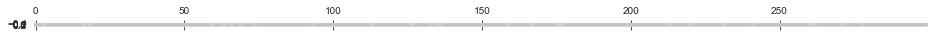

In [54]:
# CV가 가장 높은 10%비율의 변수를 추출해 다시 학습후 CV

s1 = SelectPercentile(f_classif,percentile=10)
x_train1 = s1.fit_transform(x_train, y_train.values.astype('int'))
x_test1 = s1.transform(x_test)
scaler = StandardScaler()

x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

model = LogisticRegression()
model.fit(x_train1,y_train)

score_lr = cross_val_score(model,x_train1, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score_lr.mean()))

mask = s1.get_support()
plt.matshow(mask.reshape(1,-1),cmap = 'gray')
plt.show()

### RFE
- 변수를 RFE로 추출후 CV
- 제일 높은 CV의 변수 개수를 찾아서 적용

In [55]:
# 변수를 한꺼번에 다 넣고 필요 없는거 제거, 영향을 미치는 변수를 ordering하고 가장 적게 영향을 미치는 변수 제거

from sklearn.feature_selection import RFE 

score_list = []
for i in range(10,301,5):
    s = RFE(model, i, step = 1) # i로 개수 만큼 추출
    x_train1 = s.fit_transform(x_train, y_train.values.astype('int'))
    x_test1 = s.transform(x_test)
    scaler = StandardScaler()

    x_train1 = scaler.fit_transform(x_train1)
    x_test1 = scaler.transform(x_test1)

    model = LogisticRegression()
    model.fit(x_train1,y_train)

    score_lr = cross_val_score(model,x_train1, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
    print(i,'평균 score :{}'.format(score_lr.mean()))
    score_list.append(np.mean(score_lr))

10 평균 score :0.7951923076923078
15 평균 score :0.8394230769230768
20 평균 score :0.8637820512820513
25 평균 score :0.8762820512820513
30 평균 score :0.9230769230769231
35 평균 score :0.9397435897435897
40 평균 score :0.951923076923077
45 평균 score :0.9435897435897436
50 평균 score :0.971474358974359
55 평균 score :0.9717948717948719
60 평균 score :0.9634615384615385
65 평균 score :0.9637820512820513
70 평균 score :0.9756410256410255
75 평균 score :0.9794871794871796
80 평균 score :0.9676282051282051
85 평균 score :0.9762820512820513
90 평균 score :0.9682692307692309
95 평균 score :0.9724358974358974
100 평균 score :0.9602564102564104
105 평균 score :0.9676282051282052
110 평균 score :0.9679487179487181
115 평균 score :0.964102564102564
120 평균 score :0.9400641025641028
125 평균 score :0.9442307692307693
130 평균 score :0.9442307692307693
135 평균 score :0.9285256410256411
140 평균 score :0.9205128205128206
145 평균 score :0.9160256410256411
150 평균 score :0.9
155 평균 score :0.900320512820513
160 평균 score :0.8958333333333334
165 평균 score :

In [56]:
# 75개의 변수로 모델 생성후 CV

s = RFE(model, 75, step = 1) # 75개 만큼 추출
x_train1 = s.fit_transform(x_train, y_train.values.astype('int'))
x_test1 = s.transform(x_test)
scaler = StandardScaler()

x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

model = LogisticRegression()
model.fit(x_train1,y_train)

score_lr = cross_val_score(model,x_train1, y_train ,cv = skf) # 교차검증을 StratifiedKFold로 진행
print('평균 score :{}'.format(score_lr.mean()))

평균 score :0.9794871794871796
